# Fast Upsampling in a Single Forward Pass with FeatUp (JBU)

> ⚠️ Change your collab runtime to T4 GPU before running this notebook

In this notebook we will walk through how to load and work with our catalog of pre-trained upsamplers that work with common vision backbones such as CLIP, DINO, DINO v2, and ResNet50. We note that we add a Layer Norm operation to each of these backbones prior to upsampling so keep this in mind if you are trying to replace an existing component with one of our upsampled variants. This is controlled by the `use_norm=True` flag.

In [ ]:
!git clone https://github.com/mhamilton723/FeatUp

## Install FeatUp and our fast Joint Bilateral Upsampling (JBU) Kernel

> ⚠️ This cell will take 3-5 minutes to run because of cuda kernel compilation


In [2]:
import os
os.chdir("FeatUp/")

In [ ]:
!pip install -e .
!pip install git+https://github.com/mhamilton723/CLIP.git

In [4]:
import torch
import torchvision.transforms as T
from PIL import Image

from featup.util import norm, unnorm
from featup.plotting import plot_feats

In [12]:
input_size = 224
image_path = "sample-images/plant.png"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
use_norm = True

transform = T.Compose([
    T.Resize(input_size),
    T.CenterCrop((input_size, input_size)),
    T.ToTensor(),
    norm
])

image_tensor = transform(Image.open(image_path).convert("RGB")).unsqueeze(0).to(device)

## DINO

Using cache found in /home/marhamil/.cache/torch/hub/mhamilton723_FeatUp_main
Using cache found in /home/marhamil/.cache/torch/hub/facebookresearch_dino_main
Global seed set to 0


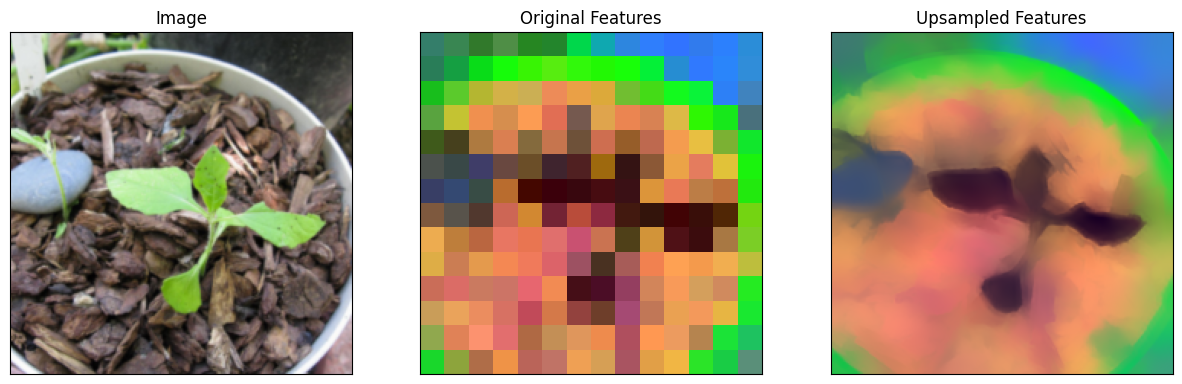

In [13]:
upsampler = torch.hub.load("mhamilton723/FeatUp", 'dino16', use_norm=use_norm).to(device)
hr_feats = upsampler(image_tensor)
lr_feats = upsampler.model(image_tensor)
plot_feats(unnorm(image_tensor)[0], lr_feats[0], hr_feats[0])


## DINO v2

Using cache found in /home/marhamil/.cache/torch/hub/mhamilton723_FeatUp_main
Using cache found in /home/marhamil/.cache/torch/hub/facebookresearch_dinov2_main
Global seed set to 0


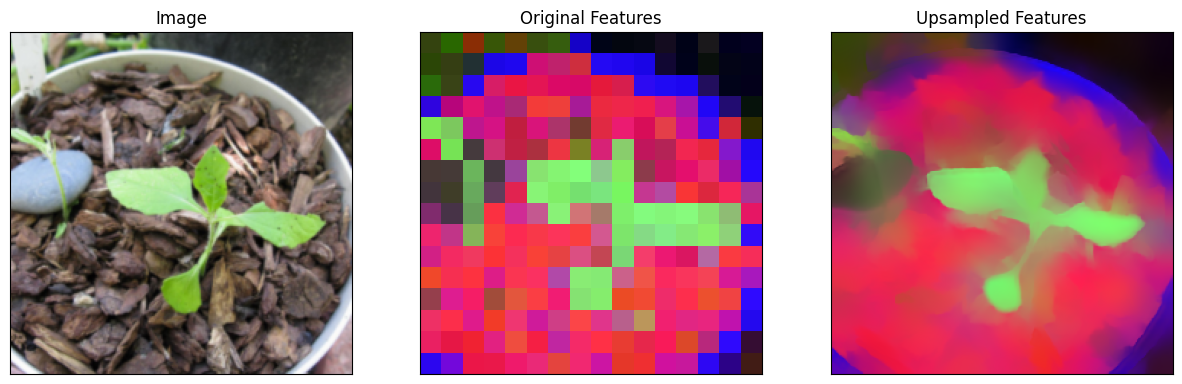

In [14]:
upsampler = torch.hub.load("mhamilton723/FeatUp", 'dinov2', use_norm=use_norm).to(device)
hr_feats = upsampler(image_tensor)
lr_feats = upsampler.model(image_tensor)
plot_feats(unnorm(image_tensor)[0], lr_feats[0], hr_feats[0])

## CLIP

Using cache found in /home/marhamil/.cache/torch/hub/mhamilton723_FeatUp_main
Global seed set to 0


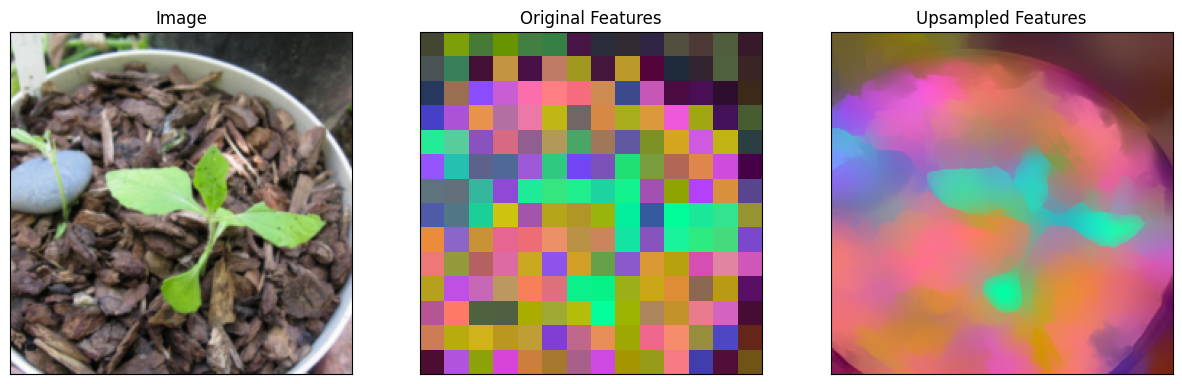

In [15]:
upsampler = torch.hub.load("mhamilton723/FeatUp", 'clip', use_norm=use_norm).to(device)
hr_feats = upsampler(image_tensor)
lr_feats = upsampler.model(image_tensor)
plot_feats(unnorm(image_tensor)[0], lr_feats[0], hr_feats[0])

# ViT

Using cache found in /home/marhamil/.cache/torch/hub/mhamilton723_FeatUp_main
Global seed set to 0


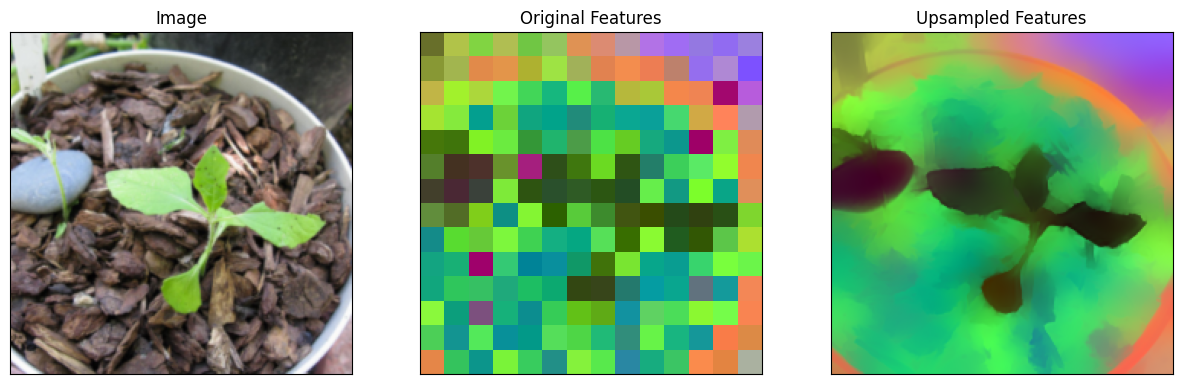

In [16]:
upsampler = torch.hub.load("mhamilton723/FeatUp", 'vit', use_norm=use_norm).to(device)
hr_feats = upsampler(image_tensor)
lr_feats = upsampler.model(image_tensor)
plot_feats(unnorm(image_tensor)[0], lr_feats[0], hr_feats[0])

# ResNet 50

Using cache found in /home/marhamil/.cache/torch/hub/mhamilton723_FeatUp_main
Global seed set to 0


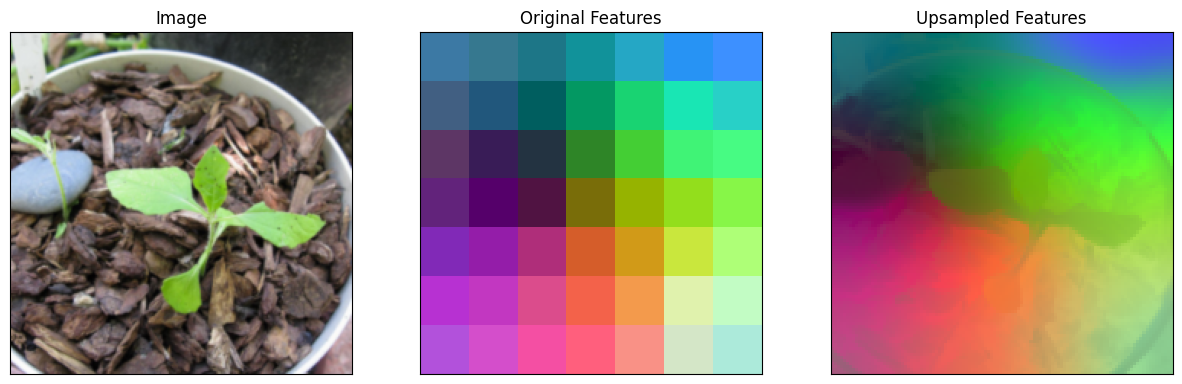

In [17]:
upsampler = torch.hub.load("mhamilton723/FeatUp", 'resnet50', use_norm=use_norm).to(device)
hr_feats = upsampler(image_tensor)
lr_feats = upsampler.model(image_tensor)
plot_feats(unnorm(image_tensor)[0], lr_feats[0], hr_feats[0])

Global seed set to 0


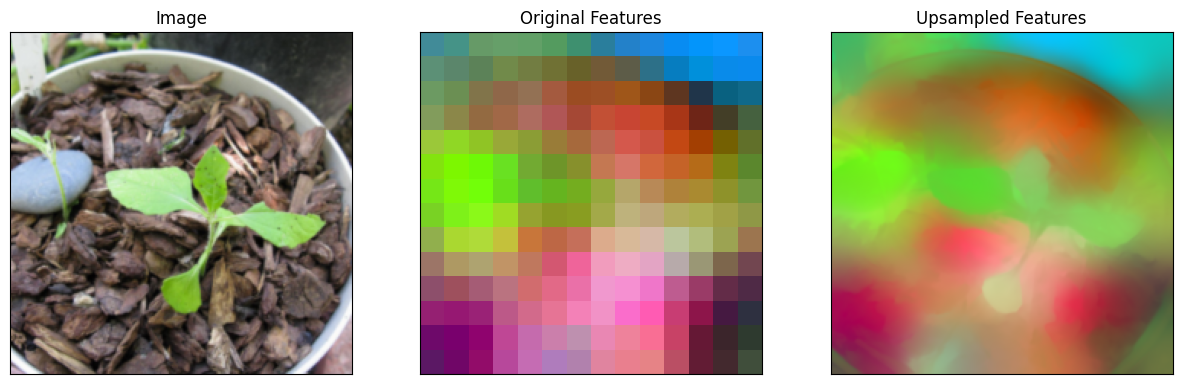

In [18]:
import torch.nn.functional as F

big_img = F.interpolate(image_tensor, scale_factor=2, mode='bilinear')
hr_feats = upsampler(big_img)
lr_feats = upsampler.model(big_img)
plot_feats(unnorm(image_tensor)[0], lr_feats[0], hr_feats[0])